In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('raw data.csv')
data.head()

,Pat_ID,Age,Sex,Name_InitialMed,Date_InitialRx,sBP_t-6,Date_t-6,sBP_t-5,Date_t-5,sBP_t-4,...,Date_t+3,sBP_t+4,Date_t+4,sBP_t+5,Date_t+5,sBP_t+6,Date_t+6,Before_BP_Ave,After_BP_Ave,Delta_Before-After
0,3009000000002127,78,Female,ACEBUTOLOL,2007-12-18,NaN,NaN,NaN,NaN,NaN,...,2008-02-05,164.0,2008-02-14,144.0,2008-08-21,140.0,2009-03-18,184.142857,171.666667,-12.476190
1,2001000000033249,60,Male,ACEBUTOLOL,2010-11-01,150.0,2008-01-14,130.0,2008-02-26,150.0,...,2012-01-17,153.0,2012-05-16,128.0,2012-06-05,118.0,2012-06-12,210.000000,190.000000,-20.000000
2,1003000000071385,84,Female,ACEBUTOLOL,2006-10-18,NaN,NaN,NaN,NaN,NaN,...,2007-08-01,162.0,2007-10-19,170.0,2008-01-11,172.0,2008-04-04,210.000000,154.666667,-55.333333
3,10001000000008854,103,Female,ACEBUTOLOL,2002-04-30,NaN,NaN,NaN,NaN,NaN,...,2003-07-08,NaN,NaN,NaN,NaN,NaN,NaN,210.000000,154.666667,-55.333333
4,1003000000139736,69,Male,ACEBUTOLOL,2006-07-18,NaN,NaN,NaN,NaN,188.0,...,2006-11-07,200.0,2006-12-05,188.0,2007-01-16,174.0,2007-03-13,183.000000,123.000000,-60.000000


In [18]:
important_features = data[['Age', 'Sex', 'Delta_Before-After', 'Name_InitialMed']]
important_features.head()

,Age,Sex,Delta_Before-After,Name_InitialMed
0,78,Female,-12.476190,ACEBUTOLOL
1,60,Male,-20.000000,ACEBUTOLOL
2,84,Female,-55.333333,ACEBUTOLOL
3,103,Female,-55.333333,ACEBUTOLOL
4,69,Male,-60.000000,ACEBUTOLOL


In [19]:
# data clearning
boolean_list = important_features['Sex'] == 'FEMALE'
important_features['Sex'][boolean_list] = 'Female'

boolean_list = important_features['Sex'] == 'MALE'
important_features['Sex'][boolean_list] = 'Male'

list_boolean = important_features['Sex'] == 'nan'
important_features['Sex'][list_boolean] = np.nan

C:\Users\gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gupta\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\gupta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self

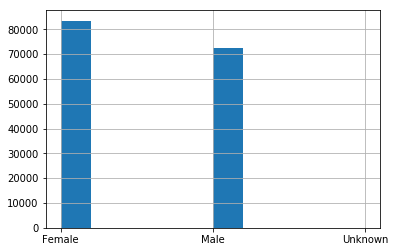

In [20]:
important_features['Sex'].hist()

In [21]:
list_boolean = (important_features['Sex'] != 'Female') & (important_features['Sex'] !=  'Male')

In [22]:
drop_rows = important_features['Sex'][list_boolean].index

In [23]:
drop_rows

Int64Index([35103, 55292, 61277, 72989, 117419, 152522], dtype='int64')

In [24]:
important_features = important_features.drop(drop_rows)

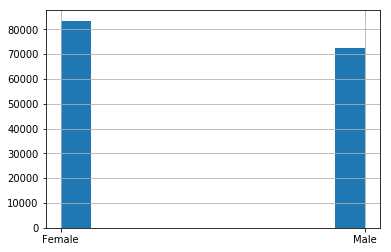

In [25]:
important_features['Sex'].hist()

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder() 
  
important_features['Sex']= le.fit_transform(important_features['Sex']) 
important_features['Name_InitialMed']= le.fit_transform(important_features['Name_InitialMed'])

important_features.head()

,Age,Sex,Delta_Before-After,Name_InitialMed
0,78,0,-12.476190,0
1,60,1,-20.000000,0
2,84,0,-55.333333,0
3,103,0,-55.333333,0
4,69,1,-60.000000,0


In [34]:
X = important_features[['Age', 'Sex', 'Delta_Before-After']]
Y = important_features['Name_InitialMed']

In [31]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [36]:
X_train.shape

(104323, 3)

In [39]:
y_train = np.array(y_train).reshape(-1,1)

In [40]:
y_test = np.array(y_test).reshape(-1,1)

In [42]:
onehot_encoder = OneHotEncoder(sparse=False)

X_train = onehot_encoder.fit_transform(X_train)

MemoryError: 

In [43]:

Y_train = onehot_encoder.fit_transform(y_train)
X_test = onehot_encoder.fit_transform(X_test)
Y_test = onehot_encoder.fit_transform(y_test)

MemoryError: 

In [15]:
onehot_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
onehot_encoded.shape

(155707, 7166)